# Lab 5

In [3]:
#!pip install numpy 
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install sklearn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

     |████████████████████████████████| 10.3 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 48.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 54.2 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 262 kB/s eta 0:00:01
     |████████████████████████████████| 22.3 MB 328 kB/s eta 0:00:01    |██▋                             | 1.8 MB 4.4 MB/s eta 0:00:05     |████████████████▋               | 11.5 MB 4.4 MB/s eta 0:00:03
     |████████████████████████████████| 303 kB 45.3 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=9d248ab83650e7a8e19bc7151d758a7728105f7470dc24e4337ca545245beaeb
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


## Question 1

This question will center around analysis of the `geyser` dataset in base `seaborn` package.  First download the dataset and name as `geyser_df`.


In [4]:
geyser_df = sns.load_dataset('geyser')

### Part A

Create a scatterplot of the `geyser_df` that plots `waiting` on the x-axis and `duration` on the y-axis.  Make the color of the dot depend on the `kind` variable, use non-base coloring, and include a legend.  Be sure to label the x- and y- axes and give your graph a title.

[Text(0.5, 1.0, 'Is the Wait Worth It?'),
 Text(0.5, 0, 'Time Waiting (min)'),
 Text(0, 0.5, 'Duration of Geyser (min)')]

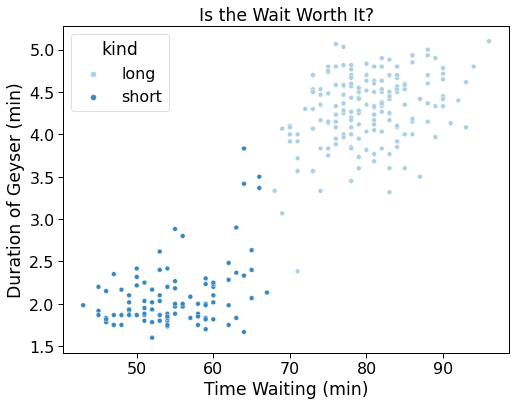

In [27]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.8)

myscatter = sns.scatterplot(data=geyser_df, x='waiting', y='duration', 
                                hue='kind', palette='Blues')

myscatter.set(
            title='Is the Wait Worth It?', 
            xlabel='Time Waiting (min)', 
            ylabel='Duration of Geyser (min)')

### Part B

Based on the plot above, you see that there is a vast difference in the `duration` of long and short geyser events.  Before you conduct an ANOVA test, you want to compare side-by-side boxplots.  Plot `kind` on the x-axis and `duration` on the y-axis.  Use `kind` as hue of the boxplot.  Name the legend and place it in a spot that does not overlap any of the data.

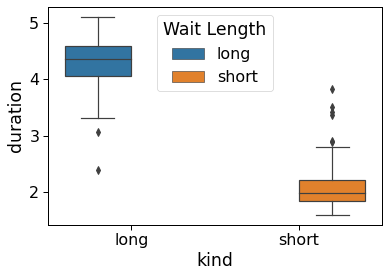

In [19]:
mybox = sns.boxplot(data=geyser_df, x='kind', y='duration',  hue='kind')
mybox.legend(title='Wait Length', loc='upper center')

### Part C

Using Pandas "groupby" option, group the dataset `geyser_df` on `kind` and then find the mean, median, standard deviation and variance of the duration for both kinds of geyser events.

In [25]:
kind_grp = geyser_df.groupby('kind')
kind_grp.agg([np.mean, np.median, np.std, np.var])['duration']

,mean,median,std,var
kind,,,,
long,4.29793,4.350,0.422677,0.178656
short,2.09433,1.983,0.394762,0.155837


### Part D

Suppose you want to test:

  H$_0$: Mean duration time of long and short geyser events are the same <br>
  H$_a$: Mean duration time of long and short geyser events are not the same

Conduct the ANOVA test at the 5% level of significance.  Include a p-value in your response.

Hint:  You will first import `scipy.stats as stats` and then use the following code:

`stats.f_oneway(df['y'][df['x'] == 'x1'], ..., [df['y'][df['x'] == 'xd'])`

Where `df` is the dataframe that holds the data to be used in the ANOVA analysis, `y` is the numerical variable you are finding/comparing means of, `x` is the categorical variable you are splitting the data based on, and `x1` to `xd` are the categorical variable output types.

In [28]:
import scipy.stats as ss

ss.f_oneway(geyser_df['duration'][geyser_df['kind'] == 'short'], 
            geyser_df['duration'][geyser_df['kind'] == 'long'])

F_onewayResult(statistic=1803.1781257548184, pvalue=1.5998565310069283e-121)

### Part E
Is there evidence of a difference between the long and short geyser event means?

Answer:  Yes!  p-value is small

## Question 2

This question will center around analysis of the car crashes dataset in base seaborn package. First download the dataset and name as `carcrash_data`.

You can read about the variables here:  https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset.  The variables reported include:

- `total`: Number of drivers involved in fatal collisions per billion miles
- `speeding`: Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
- `alcohol`: Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
- `not_distracted`: Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted
- `no_previous`: Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents
- `ins_premium`: Car Insurance Premiums in dollars
- `ins_losses`: Losses incurred by insurance companies for collisions per insured driver in dollars
- `abbrev`: State

In [29]:
carcrash_data = sns.load_dataset('car_crashes')

### Part A

Create a new column variable, `region`, which will classify the state based on the following definitions:

- `Northeast`: ME, NH, Vermont, MA, RI, CT, NY, NJ, and PA
- `Midwest`: OH, MI, IN, WI, IL, MN, IA, MO, ND, SD, NE, and KS
- `South`: DE, MD, VA, WV, KY, NC, SC, TN, GA, FL, AL, MS, AR, LA, TX, and OK
- `West`: MT, ID, WY, CO, NM, AZ, UT, NV, CA, OR, WA, AK, and HI

Create a column variable, `premium`, that reports "Above average" if the `ins_premium` value is above the average of the `ins_premium` and "Below average" elsewise.

Remove the row corresponding to "DC".

In [98]:
# Northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
# Midwest = ['OH', 'MI', 'IN', 'WI', 'IL', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
# South = ['DE', 'MD', 'VA', 'WV', 'KY', 'NC', 'SC', 'TN', 'GA', 'FL', 'AL', 'MS', 'AR', 'LA', 'TX', 'OK']
# West = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']

# myall = Northeast + Midwest + South + West

# df = pd.DataFrame({
#             'State' : myall})

# np1 = pd.unique(df.sort_values('State')['State'])
# df1 = pd.DataFrame(np1)
# len(df1)


def region(x):
    
    Northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    Midwest = ['OH', 'MI', 'IN', 'WI', 'IL', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
    South = ['DE', 'MD', 'VA', 'WV', 'KY', 'NC', 'SC', 'TN', 'GA', 'FL', 'AL', 'MS', 'AR', 'LA', 'TX', 'OK']
    West = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
    
    if (x in Northeast):
        print('Northeast')        
        return 'Northeast'
    elif (x in Midwest):
        print('Midwest')
        return 'Midwest'
    elif (x in South):
        print('South')
        return 'South'
    elif (x in West):
        print('West')
        return 'West'
    else:
        print(None)
        return None
    

def premium(x):
    
    myMean = carcrash_data['ins_premium'].mean()
    
    if (x > myMean):
        print('Above average')
        return 'Above average'
    else:
        print('Below average')
        return 'Below average'


carcrash_data['region'] = carcrash_data['abbrev'].apply(region)
carcrash_data['premium'] = carcrash_data['ins_premium'].apply(premium)

filt = (carcrash_data['abbrev'] != 'DC')
carcrash_data = carcrash_data.loc[filt]






South
West
West
South
West
West
Northeast
South
South
South
West
West
Midwest
Midwest
Midwest
Midwest
South
South
Northeast
South
Northeast
Midwest
Midwest
South
Midwest
West
Midwest
West
Northeast
Northeast
West
Northeast
South
Midwest
Midwest
South
West
Northeast
Northeast
South
Midwest
South
South
West
Northeast
South
West
South
Midwest
West
Below average
Above average
Above average
Below average
Below average
Below average
Above average
Above average
Above average
Above average
Below average
Below average
Below average
Below average
Below average
Below average
Below average
Above average
Below average
Above average
Above average
Above average
Below average
Above average
Below average
Below average
Below average
Above average
Below average
Above average
Below average
Above average
Below average
Below average
Below average
Above average
Below average
Above average
Above average
Below average
Below average
Below average
Above average
Below average
Below average
Below average
Above ave

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,region,premium
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,Below average
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Above average
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Above average
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,Below average
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Below average
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO,West,Below average
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT,Northeast,Above average
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE,South,Above average
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,South,Above average
10,15.6,2.964,3.900,14.820,14.508,913.15,142.80,GA,South,Above average


### Part B

Graph facetted histograms based on `ins_losses` variable.  Include 10 bins and color the histograms based on `region`.  The rows should represent `premium` and the columns should represent `region`, both variables created in part a.  On the y-axis, showcase the density.

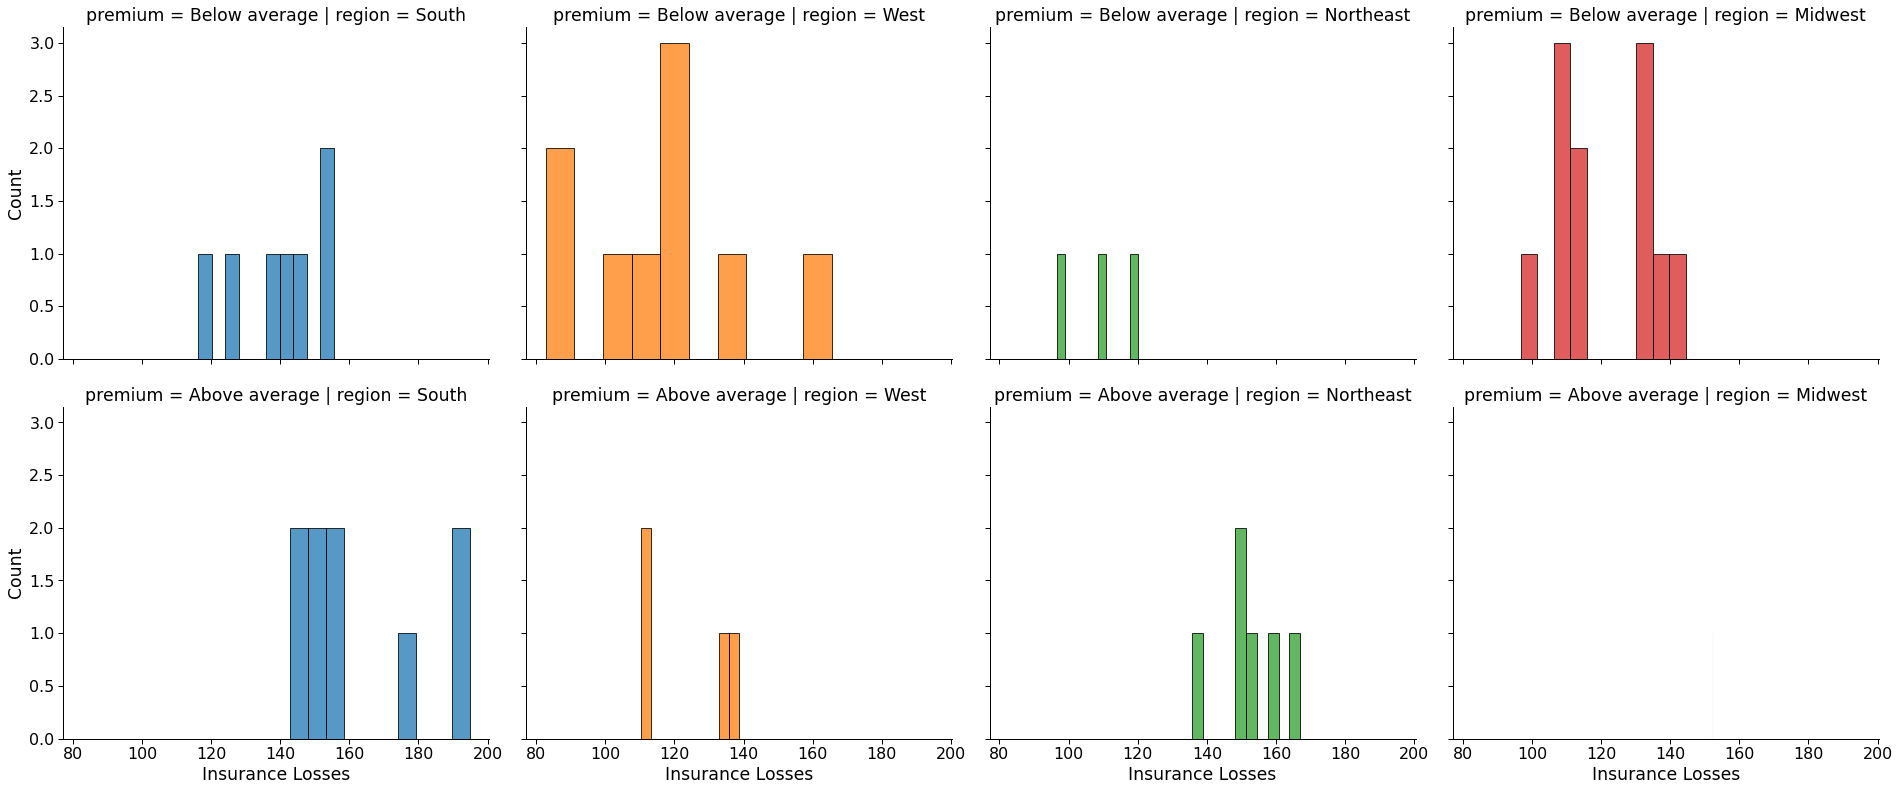

In [117]:
fac = sns.FacetGrid(carcrash_data, col='region', row='premium', 
                    height=5.5, aspect=1.2, hue='region')
fac.map_dataframe(sns.histplot, x='ins_losses', bins=10)
fac.set_axis_labels('Insurance Losses', 'Count')

### Part C

Create a pair plot of `carcrash_df` comparing `ins_premium`, `ins_losses`, `region`, `premium`, `total`, `speeding`, `alcohol`.

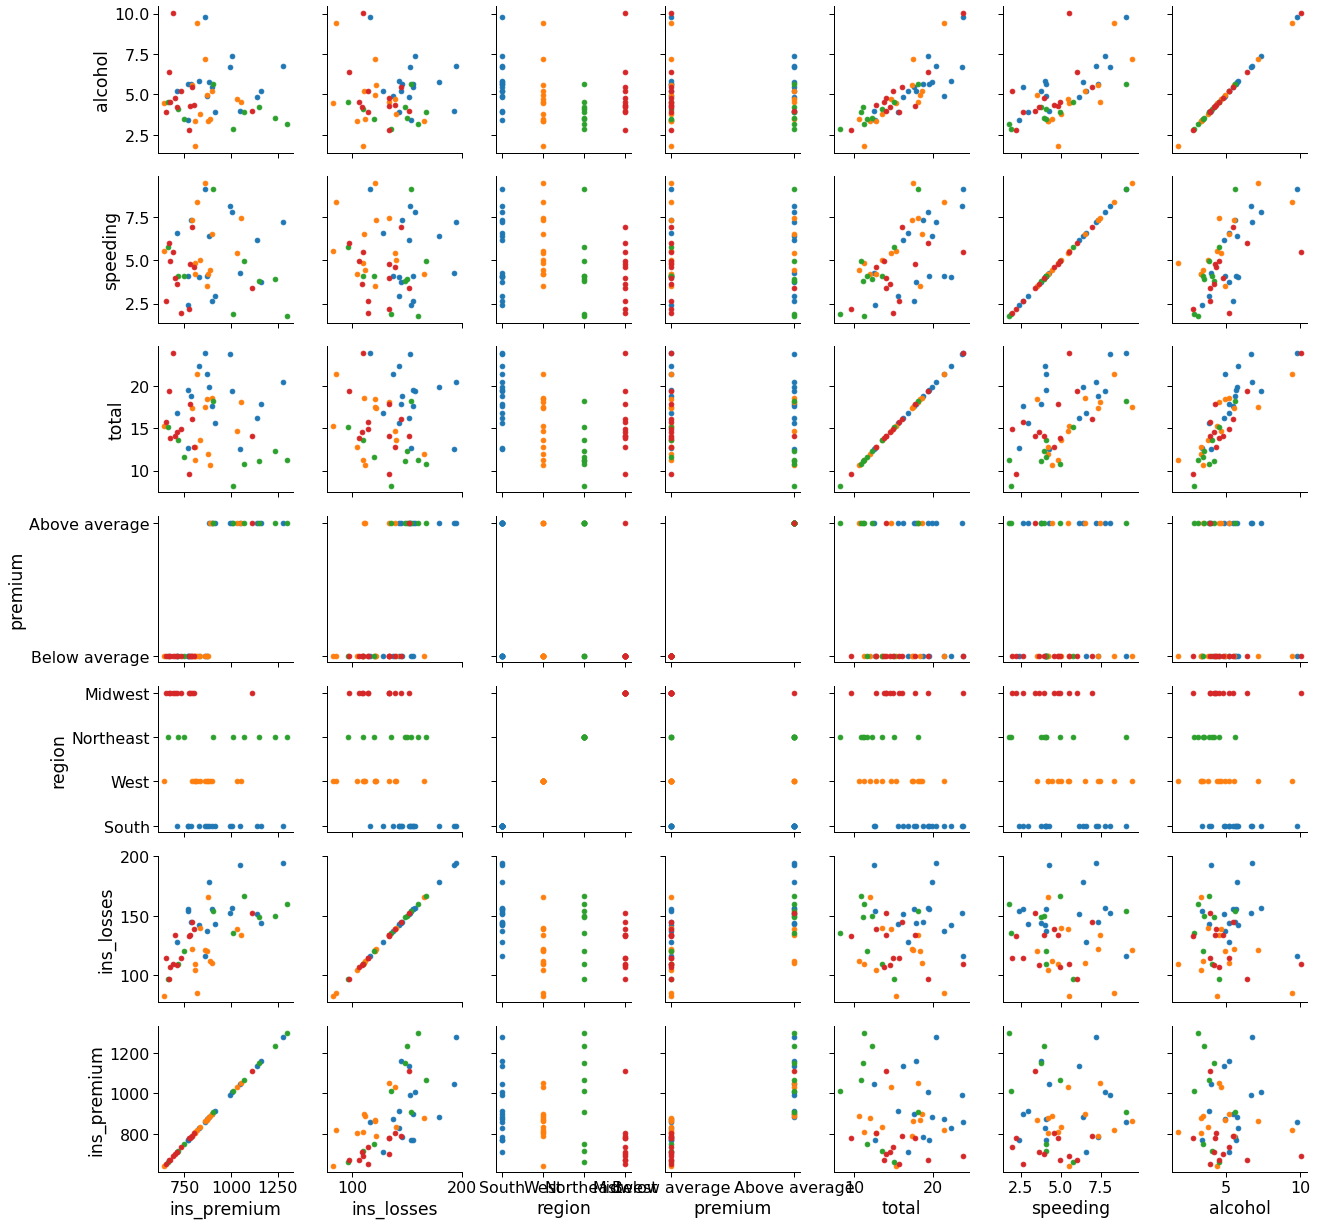

In [127]:
ax = ['ins_premium','ins_losses','region','premium','total','speeding','alcohol']
            

sns.PairGrid(carcrash_data,
             x_vars=ax,
             y_vars=reversed(ax),
             hue='region').map(plt.scatter)

### Part D

Analyzing the pairplot above, which variables do you think are highly correlated?  Does the region seem to have any difference on the relationship between the variables?

Ans: (ins_losses w/ ins_premium), (total w/ alcohol), (total w/ speeding), (alcohol w/ speeding) 

No, overall the region does not contribute much information for the correlation of the above variable. Although the South has the most accidents and Northeast has the least



## Question 3

The following questions will be analyzing the `planets` data in Seaborn package.  Import the data using the code below:

In [128]:
planets_data = sns.load_dataset('planets')
sns.set_theme(style = "ticks", palette = "pastel")
planets_data

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


### Part A

First, clean the data so that none of the columns have NaN response values.  Name this new dataset `planets_df`.  Then add a variable called `dis_flag` that returns "Far" if the distance is more then the average and "Not Far" if the distance is less than the average.

### Part B

Using a layered histogram, plot the density distribution of `year` with the overlapping bars representing the `dis_flag` variable.  Include a title, legend, axis labels.

### Part C

Does it appear there is a trend between year and distance of the planet?  When are "far" planets mostly found?

Ans:


## Question 4

Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties. He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."



In [ ]:
anscombe_df = sns.load_dataset("anscombe")

### Part A

Find the mean and variance of `x` and `y` grouping on the `dataset`.
Then, find the mean and variance of `x` and `y` without any grouping.

### Part B

Find the correlation between `x` and `y` grouped on `dataset`.
Then, find the correlation between `x` and `y` without any grouping.  Display your answers as correlation matrices.

### Part C

For each of the datasets, find the parameter estimates for the slope and y-intercept using `np.polyfit(x =, y =, d =)` where `d` is the degree.  Since we are plotting simple linear regression models, the degree we want is 1.  The output of `np.polyfit()` will be of the form: `array([a, b])`.  `a` output will be the slope and `b` output will be y-intercept.

Display your calculated slope and y-intercept values in a dataframe with the dataset as rows and slope and y-intercept as columns.  Include labeling.

### Part D

Use facet graphing to graph a scatterplot of `x` versus `y` for each dataset. Colorize each of the scatterplots based on the `dataset`.  Include the linear regression equation on each of the graphs but do not include the confidence bands.

### Part E

What does this exercise show you about relying on numeric outputs for statistical analysis?

Ans:  